In [2]:
import numpy as np
from astropy import units as u
from astropy.constants import GM_sun
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import random
import cmath
import glob
import scipy.special as ss
warnings.filterwarnings("ignore")

In [3]:
def PutLabels (x_label, y_label, title):
    #plt.style.use('ggplot')
    plt.rcParams["figure.figsize"] = (10,10)
    
    plt.figure(figsize=(10,10))
    plt.title(title)
    plt.xlabel(x_label)#, fontsize=15)
    plt.ylabel(y_label)#, fontsize=15)
    plt.legend(loc='lower right',prop={'size': 15})
    #plt.yticks(size=15)
    #plt.xticks(size=15)
    
    params = {'axes.labelsize': 16,
              'axes.titlesize': 16,
              'lines.markersize' : 10,
              'xtick.labelsize' : 16,
              'ytick.labelsize' : 16,
              'font.size':16,
              'lines.markersize':6
             }
    plt.rcParams.update(params)
    


In [4]:
def Phase(df):
    
    return [float(-1j*np.log(complex(r)/abs(complex(r)))) for r in df.res_adaptive.values]


In [5]:
def beta(theta,b):
    return theta - theta/np.sqrt(b**2.+theta**2.)

In [6]:
def Smoothing(amp,w):
    
    #df=pd.read_csv(path, sep="\t")
    #amp=[float(abs(complex(i))) for i in df.res_adaptive.values]
    #w=df.w.values    
    w=np.ndarray.tolist(w)
    flag=[]
    for k in range(len(w)-1):
        if abs(amp[k]-amp[k-1]) > 1. and  abs(amp[k]-amp[k+1])>1:
            flag.append(k)
    for f in flag:
        del amp[f]  
        del w[f]

            
            
    

## Point mass

In [348]:
folder_point='./Results/pointmass/*'
folders_list_point=sorted(glob.glob(folder_point))
yLin=[0.1, 0.3,1.0,3.0]
w_range=np.linspace(0.001,100,5000)
#print(folders_list_point)

folder_point_levin='./Results/point/L*'
folders_list_point_levin=sorted(glob.glob(folder_point_levin))
yLin=[0.1, 0.3,1.0,3.0]
#print(folders_list_point_levin)

dfpoint_lev=pd.read_csv(folders_list_point_levin[0], sep="\t")
point_amp_lev=[float(abs(complex(i))) for i in dfpoint_lev.res_adaptive.values]
point_phase_lev=Phase(dfpoint_lev)

No handles with labels found to put in legend.
No handles with labels found to put in legend.


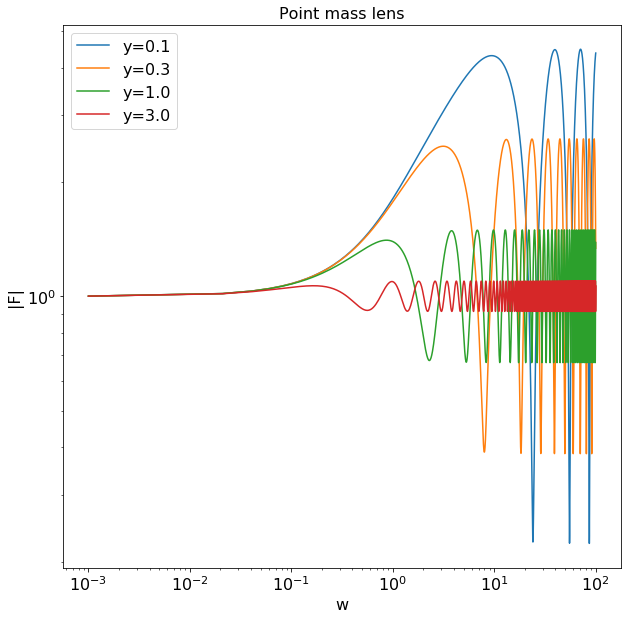

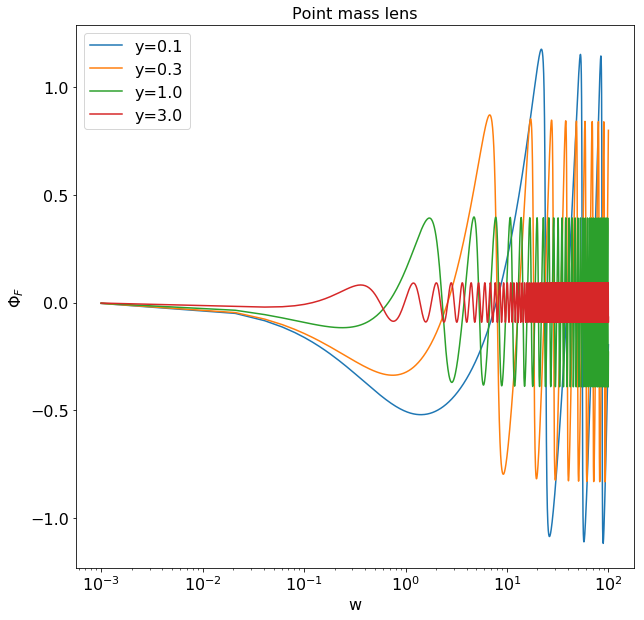

In [350]:
PutLabels('w','|F|','Point mass lens')
for fol,y in zip(folders_list_point, yLin):

    dfpoint=pd.read_csv(fol, sep="\t")
    amp=dfpoint.Famp.values
    #phase=dfpoint.Fphase.values

    plt.plot(w_range,amp,'-',label='y='+str(y))
    plt.xscale('log')
    plt.yscale('log')
    plt.legend()
    plt.savefig('./Results/pointmass/amp_analytic_pointmass.png')
    #plt.show()
#plt.plot(w,point_amp_lev, 'k-', lw=0.7, )


PutLabels('w','$\Phi_F$','Point mass lens')


for fol,y in zip(folders_list_point, yLin):

    dfpoint=pd.read_csv(fol, sep="\t")
   
    phase=dfpoint.Fphase.values

    plt.plot(w_range,phase,'-',label='y='+str(y))
    plt.xscale('log')
    #plt.yscale('log')
    plt.legend()
  
plt.savefig('./Results/point/phase_analytic_pointmass.png')


No handles with labels found to put in legend.
No handles with labels found to put in legend.


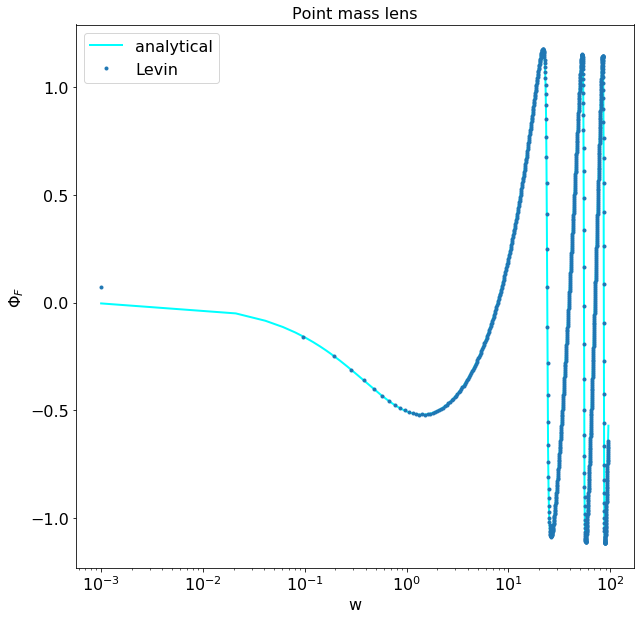

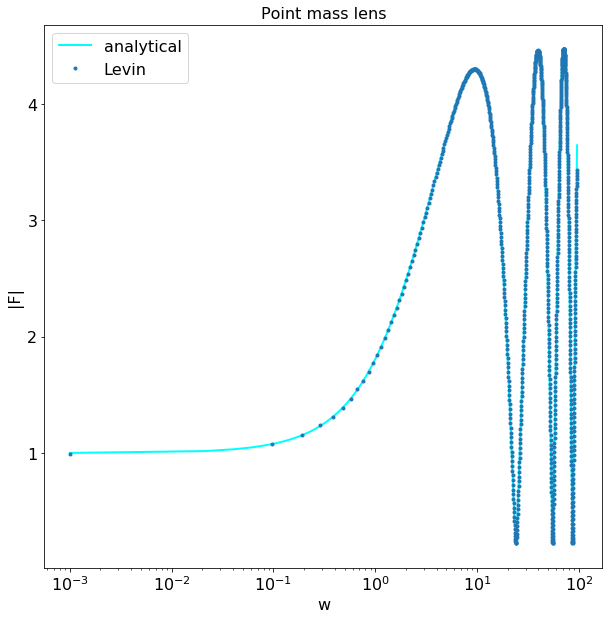

In [323]:
PutLabels('w','$\Phi_F$','Point mass lens')

dfpoint=pd.read_csv(folders_list_point[0], sep="\t")
phase=dfpoint.Fphase.values
plt.plot(w_range[:-200],phase[:-200],'-',label='analytical', color='cyan',lw=2) 
plt.xscale('log')
    
dfpoint=pd.read_csv(folders_list_point_levin[0], sep="\t")
phase=Phase(dfpoint)
plt.plot(dfpoint.w.values,phase, '.', lw=1, label='Levin' )
plt.legend()
plt.savefig('./Results/point/phase_analytic&levin_pointmass.png')
#plt.show()


PutLabels('w','|F|','Point mass lens')

dfpoint=pd.read_csv(folders_list_point[0], sep="\t")
plt.plot(w_range[:-200],dfpoint.Famp.values[:-200],'-',label='analytical', color='cyan',lw=2) 
plt.xscale('log')
    
dfpoint=pd.read_csv(folders_list_point_levin[0], sep="\t")
amp=[float(abs(complex(i))) for i in dfpoint.res_adaptive.values]
plt.plot(dfpoint.w.values,amp, '.', lw=1, label='Levin' )
plt.legend()
plt.savefig('./Results/point/amp_analytic&levin_pointmass.png')
#plt.show()

## SIS


In [10]:
folderSIS='./Results/SIScore/Levin_SIScore_lens_dist_0.14*'#b=0/Levin_SIScore_lens_dist_*'
folders_listSIS=sorted(glob.glob(folderSIS))
yLin=[0.25,0.5,0.75,1,3] #[0.25,0.5,0.75,1,1.5,3]
folders_listSIS

['./Results/SIScore/Levin_SIScore_lens_dist_0.141_a_1_b_0_c_1.txt']

No handles with labels found to put in legend.


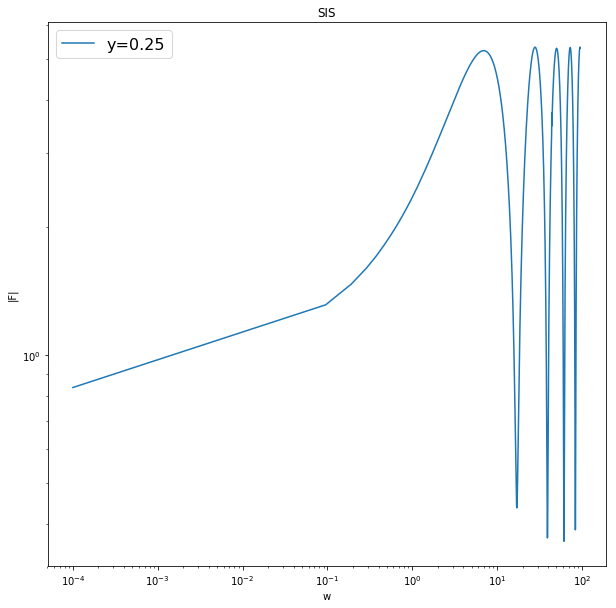

In [11]:
PutLabels('w','|F|','SIS')
for fol,y in zip(folders_listSIS, yLin):
    dfSIS=pd.read_csv(fol, sep="\t")
    amp=[float(abs(complex(i))) for i in dfSIS.res_adaptive.values]
    w=dfSIS.w.values
    plt.plot(w,amp,'-',label='y='+str(y))
    plt.xscale('log')
    plt.yscale('log')

#plt.plot(wpoint,pointRefamp, label='point mass', color='k', lw=0.7)
#plt.axvline(x=w[573], c='k')
plt.legend()
plt.savefig('./Results/SIScore/SIS.png')
plt.show()

No handles with labels found to put in legend.


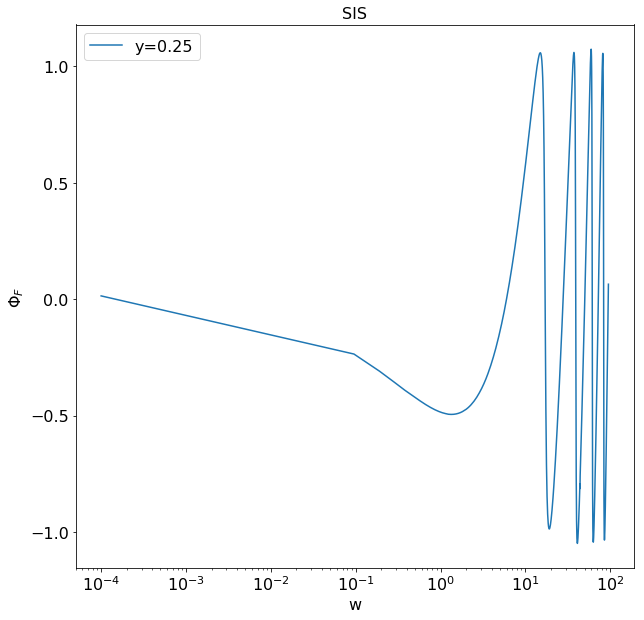

In [13]:
PutLabels('w','$\Phi_F$','SIS')
for fol,y in zip(folders_listSIS, yLin):
    dfSIS=pd.read_csv(fol, sep="\t")
    phaseSIS=Phase(dfSIS)
    w=dfSIS.w.values
    plt.plot(w,phaseSIS,'-',label='y='+str(y))
    plt.xscale('log')
     
#plt.plot(wpoint,pointRefphase, label='point mass', color='k', lw=0.7)
#plt.axvline(x=3.33748, c='k')
#plt.axvline(x=22.40306, c='k')
plt.legend()
plt.savefig('Results/SIScore/phase_SIS.png')
plt.show()

No handles with labels found to put in legend.


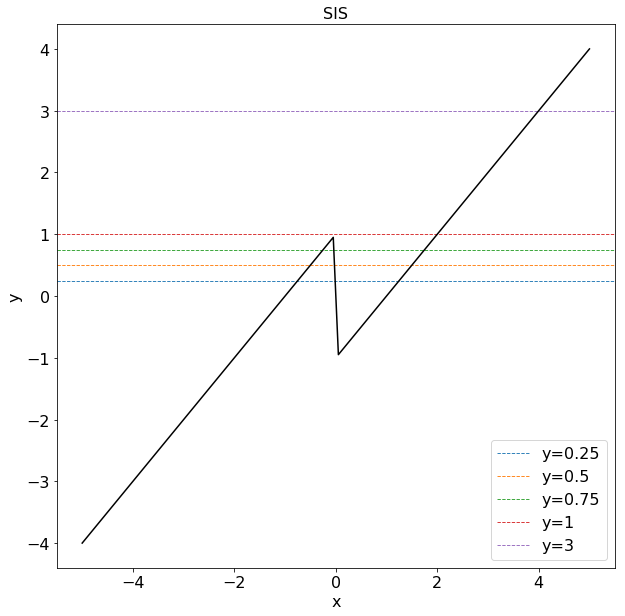

In [360]:
PutLabels('x','y','SIS')
theta=np.linspace(-5,5,100)
ax = plt.gca()
for y in yLin:
    #plt.plot(theta,beta(theta,b),'-',label='b='+str(b))
    vline_color = next(ax._get_lines.prop_cycler)['color']
    plt.axhline(y,ls='--',linewidth=0.9, color=vline_color,label='y='+str(y))
    #plt.xlim(1, 100)
    
plt.plot(theta,beta(theta,0),'-', color='k')    

plt.legend()
#plt.axes()
plt.savefig('Results/SIScore/lens_eq_b=0.png')
plt.show()

## SIS core

## b=0.5

In [361]:
folderSIS='./Results/SIScore/b=0.5/Levin_SIScore_lens_dist_*'
folders_listSIS=sorted(glob.glob(folderSIS))
yLin=[0.1,0.25,0.5,1,3]
folders_listSIS

['./Results/SIScore/b=0.5/Levin_SIScore_lens_dist_0.1_a_1_b_0.5_c_1.txt',
 './Results/SIScore/b=0.5/Levin_SIScore_lens_dist_0.25_a_1_b_0.5_c_1.txt',
 './Results/SIScore/b=0.5/Levin_SIScore_lens_dist_0.5_a_1_b_0.5_c_1.txt',
 './Results/SIScore/b=0.5/Levin_SIScore_lens_dist_1.0_a_1_b_0.5_c_1.txt',
 './Results/SIScore/b=0.5/Levin_SIScore_lens_dist_3_a_1_b_0.5_c_1.txt']

No handles with labels found to put in legend.


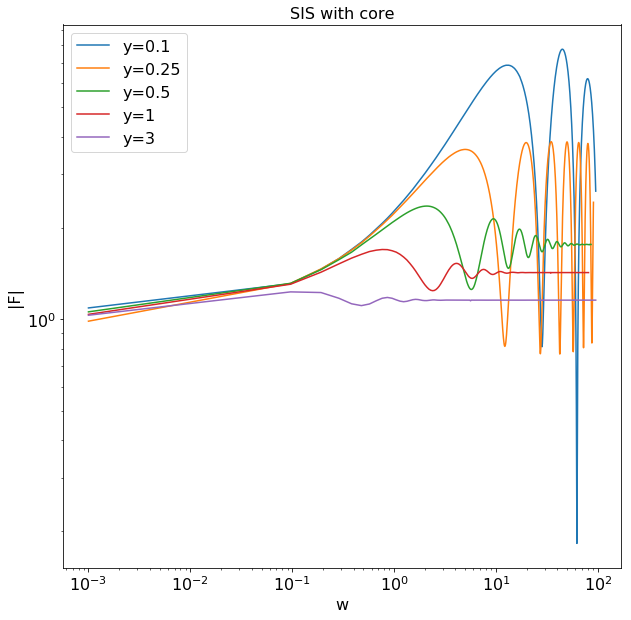

In [362]:
PutLabels('w','|F|','SIS with core')
for fol,y in zip(folders_listSIS, yLin):
    dfCore=pd.read_csv(fol, sep="\t")
    amp=[float(abs(complex(i))) for i in dfCore.res_adaptive.values]
    w=dfCore.w.values
    plt.plot(w,amp,'-',label='y='+str(y))
    plt.xscale('log')
    plt.yscale('log')

#plt.plot(wpoint,pointRefamp, label='point mass', color='k', lw=0.7)

plt.legend()
plt.savefig('./Results/SIScore/SIS_core_b=0.5.png')
plt.show()

No handles with labels found to put in legend.


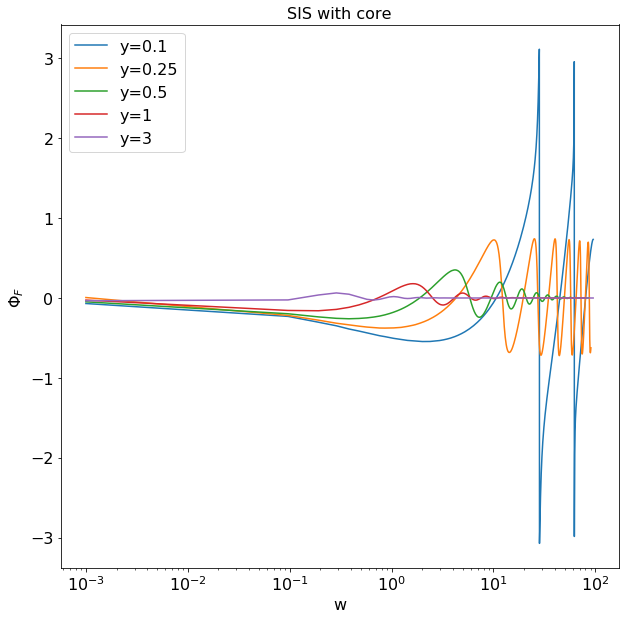

In [363]:
PutLabels('w','$\Phi_F$','SIS with core')
for fol,y in zip(folders_listSIS, yLin):
    dfCore=pd.read_csv(fol, sep="\t")
    phaseSIS=Phase(dfCore)
    w=dfCore.w.values
    plt.plot(w,phaseSIS,'-',label='y='+str(y))
    plt.xscale('log')
     
#plt.plot(wpoint,pointRefphase, label='point mass', color='k', lw=0.7)

plt.legend()
plt.savefig('Results/SIScore/phase_SIS_core_b=0.5.png')
plt.show()

No handles with labels found to put in legend.


#1f77b4
#ff7f0e
#2ca02c
#d62728
#9467bd


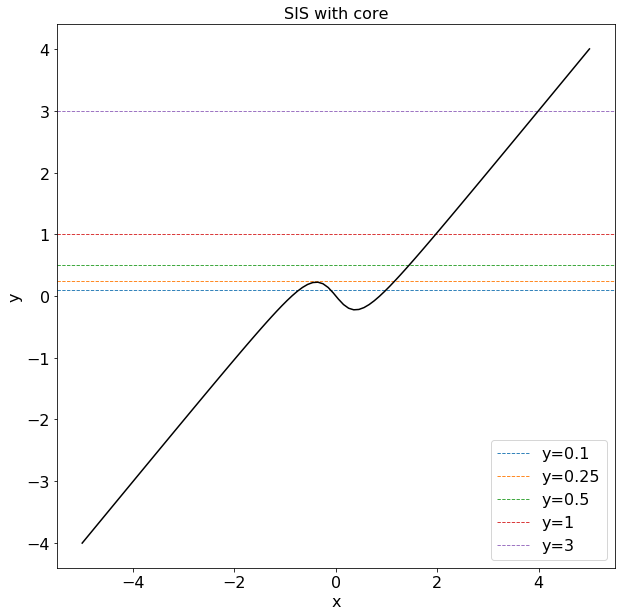

In [364]:
PutLabels('x','y','SIS with core')
theta=np.linspace(-5,5,100)
ax = plt.gca()
for y in yLin:
    #plt.plot(theta,beta(theta,b),'-',label='b='+str(b))
    vline_color = next(ax._get_lines.prop_cycler)['color']
    print(vline_color)
    plt.axhline(y,ls='--',linewidth=0.9, color=vline_color,label='y='+str(y))
    #plt.xlim(1, 100)
    
plt.plot(theta,beta(theta,0.5),'-', color='k')    
plt.legend()
#plt.axes()
plt.savefig('Results/SIScore/lens_eq_b=0.5.png')
plt.show()

## y=0.3

In [130]:
folder='./Results/SIScore/y=0.3/Levin_SIScore_lens_dist_*'
folders_list=sorted(glob.glob(folder))
bLin=[0.0,0.25,0.5,1.0]
folders_list

['./Results/SIScore/y=0.3/Levin_SIScore_lens_dist_0.3_a_1_b_0.0_c_1.txt',
 './Results/SIScore/y=0.3/Levin_SIScore_lens_dist_0.3_a_1_b_0.25_c_1.txt',
 './Results/SIScore/y=0.3/Levin_SIScore_lens_dist_0.3_a_1_b_0.5_c_1.txt',
 './Results/SIScore/y=0.3/Levin_SIScore_lens_dist_0.3_a_1_b_1.0_c_1.txt']

No handles with labels found to put in legend.


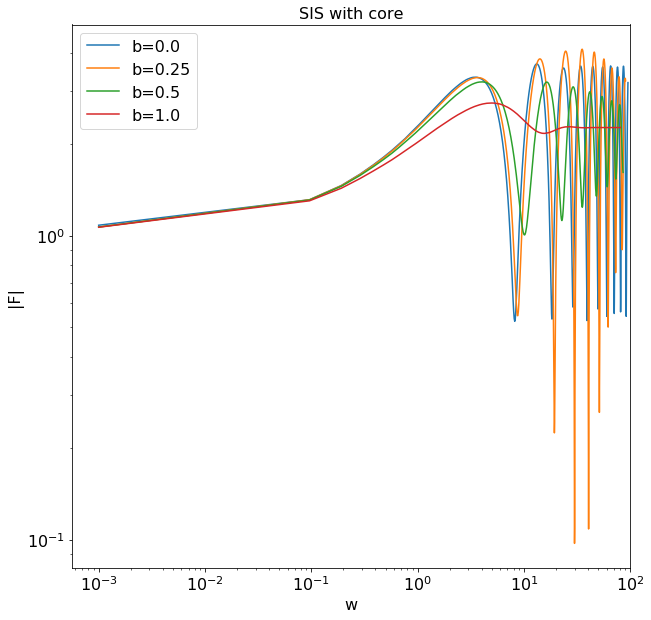

In [131]:
PutLabels('w','|F|','SIS with core')
for fol,b in zip(folders_list, bLin):
    #print(b)
    dfCore=pd.read_csv(fol, sep="\t")
    amp=[float(abs(complex(i))) for i in dfCore.res_adaptive.values]
    #phase=[float(cmath.phase(complex(i))) for i in dfCore.res_adaptive.values]
    #if y==1.25 or y==1:
    #    pass 
    #else:
    w=dfCore.w.values
    plt.plot(w,amp,'-',label='b='+str(b))
    plt.xscale('log')
    plt.yscale('log')
    plt.xlim(0, 100)

#plt.plot(wpoint,pointRefamp, label='point mass', color='k', lw=0.7)

plt.legend()
plt.savefig('./Results/SIScore/amp_SIS_core_y=0.3.png')
plt.show()

No handles with labels found to put in legend.


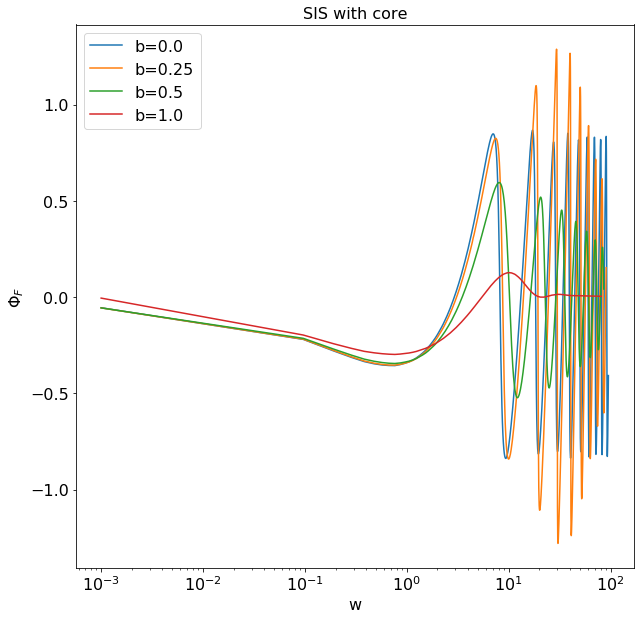

In [341]:
PutLabels('w','$\Phi_F$','SIS with core')
for fol,b in zip(folders_list, bLin):
    dfCore=pd.read_csv(fol, sep="\t")
    w=dfCore.w.values
    phase=Phase(dfCore)
    #phase=[float(cmath.phase(complex(i))) for i in dfCore.res_adaptive.values]
    plt.plot(w,phase,'-',label='b='+str(b))
    plt.xscale('log')

     
#plt.plot(wpoint,pointRefphase, label='point mass', color='k', lw=0.7)
plt.legend()
plt.savefig('Results/SIScore/phase_SIS_core_y=0.3.png')
plt.show()

No handles with labels found to put in legend.


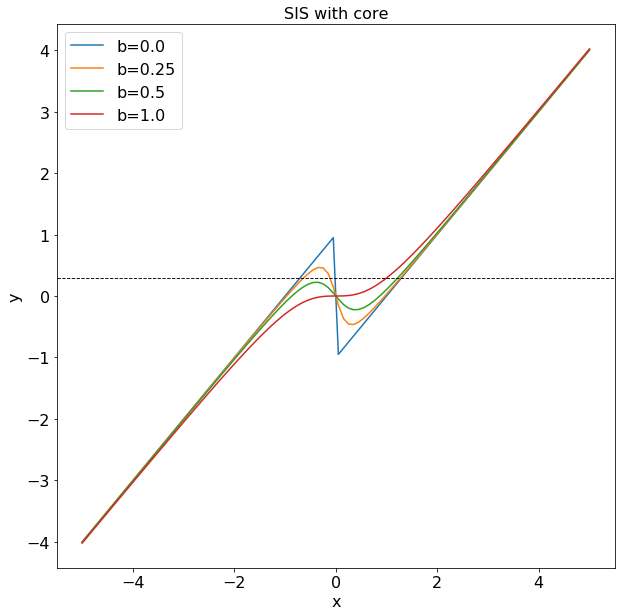

In [318]:
theta=np.linspace(-5,5,100)
PutLabels('x','y','SIS with core')
ax = plt.gca()
for b in bLin:
    #plt.plot(theta,beta(theta,b),'-',label='b='+str(b))
    vline_color = next(ax._get_lines.prop_cycler)['color']
    plt.plot(theta,beta(theta,b),'-',label='b='+str(b), color=vline_color)
plt.axhline(0.3,ls='--',linewidth=0.9, color='k')
    #plt.xlim(1, 100)
    
#plt.axhline(0,color='k',ls='-',linewidth=1)
#plt.axvline(0,color='k',ls='-',linewidth=1)
#plt.axhline(beta(0.51),color='b',ls='--',linewidth=0.5, label=r'$\beta$')

plt.legend()
#plt.axes()
plt.savefig('Results/SIScore/lens_eq_y=0.3.png')
plt.show()

## Softened power law lens 


### b=0.5

In [299]:
folder_soft='./Results/softenedpowerlaw/b=0.5/Levin*'
folders_list_soft=sorted(glob.glob(folder_soft))
pLin=[0.5,1,1.3,1.5]
print(pLin)
folders_list_soft

[0.5, 1, 1.3, 1.5]


['./Results/softenedpowerlaw/b=0.5/Levin_softenedpowerlaw_lens_dist_0.3_a_1_b_0.5_c_1_p_0.5.txt',
 './Results/softenedpowerlaw/b=0.5/Levin_softenedpowerlaw_lens_dist_0.3_a_1_b_0.5_c_1_p_1.0.txt',
 './Results/softenedpowerlaw/b=0.5/Levin_softenedpowerlaw_lens_dist_0.3_a_1_b_0.5_c_1_p_1.3.txt',
 './Results/softenedpowerlaw/b=0.5/Levin_softenedpowerlaw_lens_dist_0.3_a_1_b_0.5_c_1_p_1.5.txt']

In [300]:
def Smoothing(amp,w):
    
    #df=pd.read_csv(path, sep="\t")
    #amp=[float(abs(complex(i))) for i in df.res_adaptive.values]
    #w=df.w.values    
    w=np.ndarray.tolist(w)
    flag=[]
    #print(len(w))
    for k in range(len(w)-1):
        if abs(amp[k]-amp[k-1]) > 1. and  abs(amp[k]-amp[k+1])>1:
            flag.append(k)
            #print(k)
    i=0
    for f in flag:
        del amp[f-i]  
        del w[f-i]
        i+=1
        
    #print(len(w))
    return amp,w

            
            
    

No handles with labels found to put in legend.


./Results/softenedpowerlaw/b=0.5/Levin_softenedpowerlaw_lens_dist_0.3_a_1_b_0.5_c_1_p_0.5.txt
./Results/softenedpowerlaw/b=0.5/Levin_softenedpowerlaw_lens_dist_0.3_a_1_b_0.5_c_1_p_1.0.txt
./Results/softenedpowerlaw/b=0.5/Levin_softenedpowerlaw_lens_dist_0.3_a_1_b_0.5_c_1_p_1.3.txt


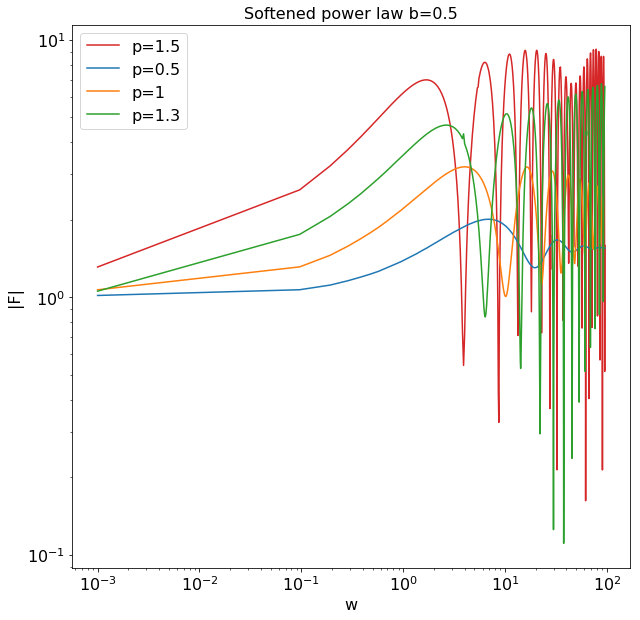

In [309]:


PutLabels('w','|F|','Softened power law b=0.5')


dfSoft=pd.read_csv('./Results/softenedpowerlaw/b=0.5/Levin_softenedpowerlaw_lens_dist_0.3_a_1_b_0.5_c_1_p_1.5.txt', sep="\t")
amp=[float(abs(complex(i))) for i in dfSoft.res_adaptive.values]
w=dfSoft.w.values
amp,w=Smoothing(amp,w)

plt.plot(w,amp,'-' c='#d62728')

for fol,p in zip(folders_list_soft[:-1], pLin[:-1]):
    print(fol)
    dfSoft=pd.read_csv(fol, sep="\t")
    amp=[float(abs(complex(i))) for i in dfSoft.res_adaptive.values]
    w=dfSoft.w.values
    amp,w=Smoothing(amp,w)

    plt.plot(w,amp,'-',label='p='+str(p))
    plt.xscale('log')
    plt.yscale('log')
 
plt.plot(np.nan,np.nan,'-',label='p=1.5', c='#d62728')
plt.legend()
plt.savefig('./Results/softenedpowerlaw/b=0.5/amp_softenedpowerlaw_b=0.5.png')
#plt.plot(w[773],amp[773],'b.')


In [307]:
#dfSoft=pd.read_csv('./Results/softenedpowerlaw/b=0.5/Levin_softenedpowerlaw_lens_dist_0.3_a_1_b_0.5_c_1_p_1.5.txt', sep="\t")

#Smoothing([float(abs(complex(i))) for i in dfSoft.res_adaptive.values],dfSoft.w.values)

No handles with labels found to put in legend.


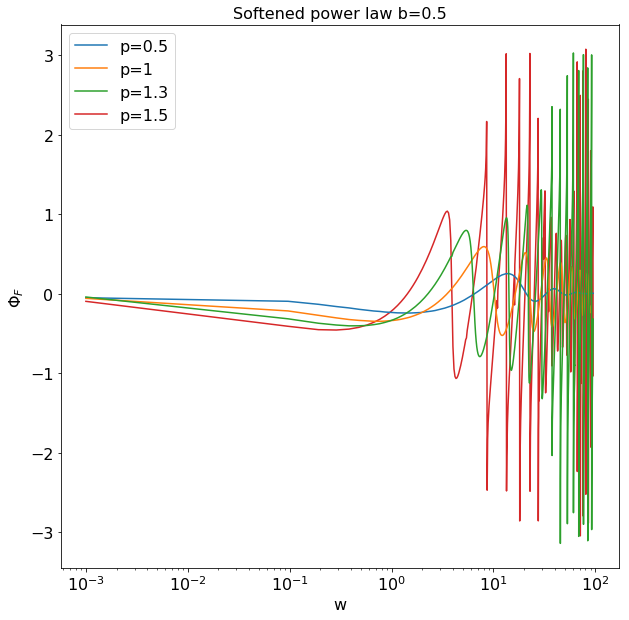

In [340]:
PutLabels('w','$\Phi_F$','Softened power law b=0.5')

dfSoft=pd.read_csv('./Results/softenedpowerlaw/b=0.5/Levin_softenedpowerlaw_lens_dist_0.3_a_1_b_0.5_c_1_p_1.5.txt', sep="\t")
phase=[float(cmath.phase(complex(i))) for i in dfSoft.res_adaptive.values]    
plt.plot(dfSoft.w.values,phase,'-', c='#d62728')


for fol,p in zip(folders_list_soft[:-1], pLin[:-1]):

    dfSoft=pd.read_csv(fol, sep="\t")
    phase=[float(cmath.phase(complex(i))) for i in dfSoft.res_adaptive.values]    
    plt.plot(dfSoft.w.values,phase,'-',label='p='+str(p))
    plt.xscale('log')


plt.plot(np.nan,np.nan,'-',label='p=1.5', c='#d62728')
#plt.plot(SISRef.w.values,SISRefphase, 'k--', label='SIS',linewidth='0.7')
plt.legend()
plt.savefig('./Results/softenedpowerlaw/b=0.5/phase_softenedpowerlaw_b=0.5.png')


## Softened power law kappa b=0.5 

In [117]:
folder_pk='./Results/softenedpowerlawkappa/b=0.5/Levin*'
folders_list_pk=sorted(glob.glob(folder_pk))
w_range=np.linspace(0.001,100,1000)
pLin=[-1,-2,0.5,1]#1.3,1.5,1.7]
folders_list_pk

['./Results/softenedpowerlawkappa/b=0.5/Levin_softenedpowerlawkappa_lens_dist_0.3_a_1_b_0.5_p_-1.0.txt',
 './Results/softenedpowerlawkappa/b=0.5/Levin_softenedpowerlawkappa_lens_dist_0.3_a_1_b_0.5_p_-2.0.txt',
 './Results/softenedpowerlawkappa/b=0.5/Levin_softenedpowerlawkappa_lens_dist_0.3_a_1_b_0.5_p_0.5.txt',
 './Results/softenedpowerlawkappa/b=0.5/Levin_softenedpowerlawkappa_lens_dist_0.3_a_1_b_0.5_p_1.0.txt']

No handles with labels found to put in legend.


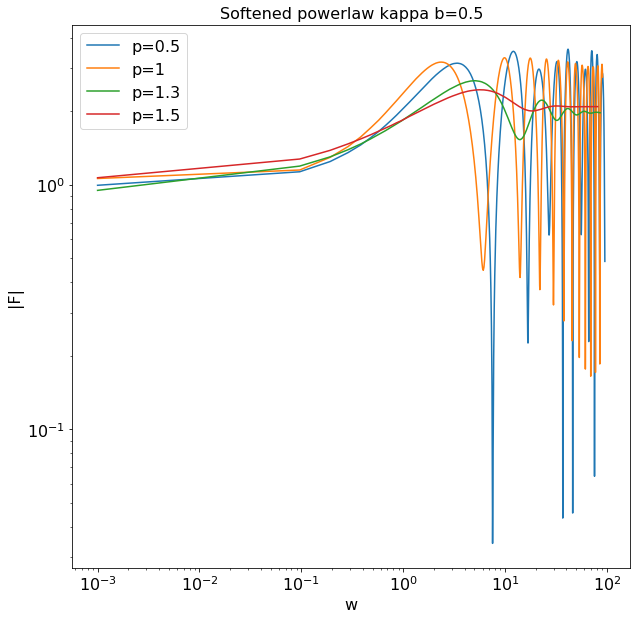

In [285]:
PutLabels('w','|F|','Softened powerlaw kappa b=0.5')
for fol,p in zip(folders_list_pk, pLin):

    dfpk=pd.read_csv(fol, sep="\t")   
    amp=[float(abs(complex(i))) for i in dfpk.res_adaptive.values]
    plt.plot(dfpk.w.values,amp,'-',label='p='+str(p))
    plt.xscale('log')
    plt.yscale('log')
    #plt.xlim(1,100)
#plt.plot(SISRef.w.values,SISRefamp, 'k--', label='SIS',linewidth='0.7')
#plt.plot(wpoint,pointRefamp, 'k-',label='point mass',linewidth='0.7')
plt.legend()
plt.savefig('./Results/softenedpowerlawkappa/b=0.5/Amp_softenedpowerlawkappla.png')

#plt.axvline(w[7],color='k',ls='-',linewidth=1,alpha=0.1)

No handles with labels found to put in legend.


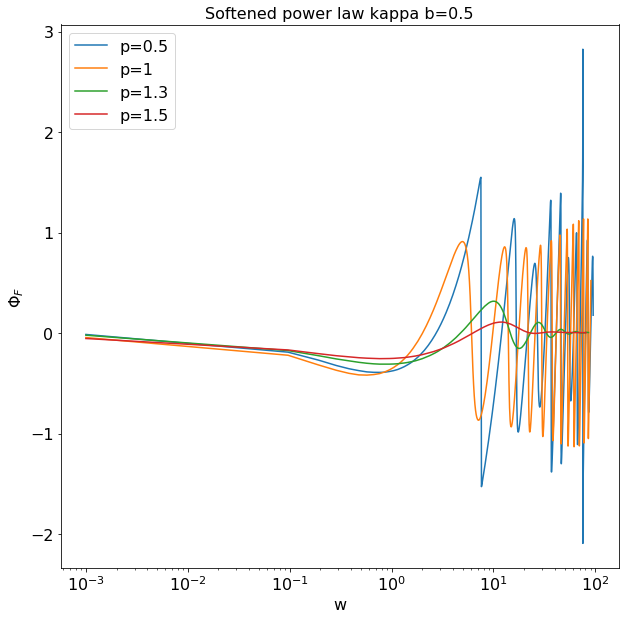

In [339]:
PutLabels('w','$\Phi_F$','Softened power law kappa b=0.5')
for fol,p in zip(folders_list_pk, pLin):

    dfpk=pd.read_csv(fol, sep="\t")
    phase=[float(cmath.phase(complex(i))) for i in dfpk.res_adaptive.values]    
    plt.plot(dfpk.w.values,phase,'-',label='p='+str(p))
    plt.xscale('log')
   
    #plt.show()

#plt.plot(SISRef.w.values,SISRefphase, 'k--', label='SIS',linewidth='0.7')
#plt.plot(wpoint,pointRefphase, 'k-',label='point mass',linewidth='0.7')
plt.legend()
plt.savefig('./Results/softenedpowerlawkappa/b=0.5/phase_softenedpowerlawkappa')

In [110]:
SISRef=pd.read_csv('./Results/SIScore/ref/Levin_SIScore_lens_dist_0.3_a_1_b_0.0_c_1.txt', sep="\t")
SISRefamp=[float(abs(complex(i))) for i in SISRef.res_adaptive.values]
SISRefphase=Phase(SISRef)

In [111]:
folder='./Results/softenedpowerlawkappa/p=1/Levin_softenedpowerlawkappa_lens_dist_0.3_a_1_b_0_p_1.txt'


No handles with labels found to put in legend.


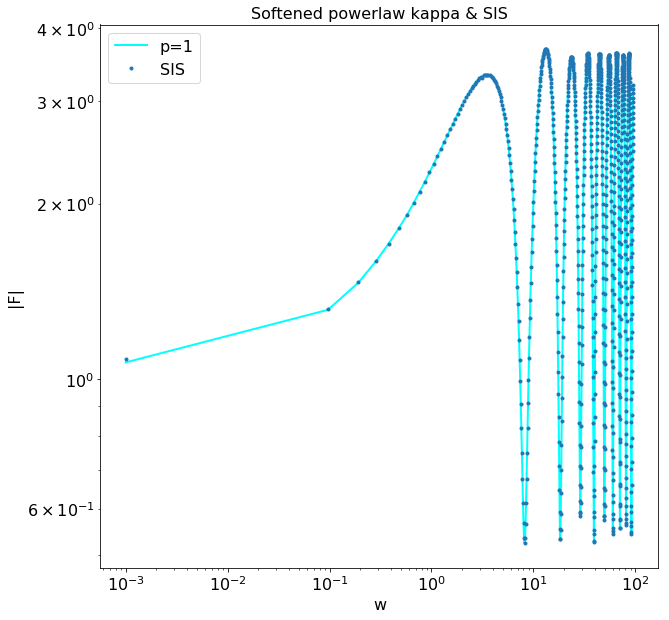

No handles with labels found to put in legend.


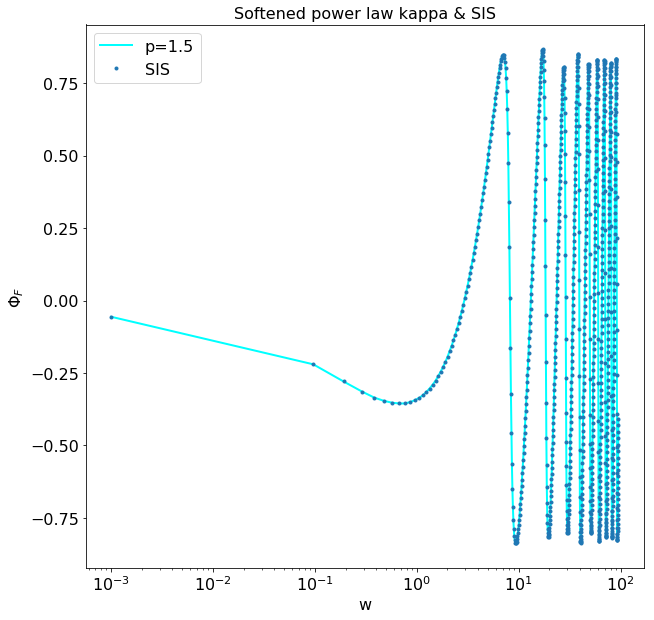

In [338]:
PutLabels('w','|F|','Softened powerlaw kappa & SIS')


dfpk=pd.read_csv(folder, sep="\t")   
amp=[float(abs(complex(i))) for i in dfpk.res_adaptive.values]
plt.plot(dfpk.w.values,amp,'-',label='p='+str(1),c='cyan',lw=2)
plt.plot(SISRef.w.values,SISRefamp,'.',label='SIS')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.savefig('./Results/softenedpowerlawkappa/amp_SIS-soft-K.png')
plt.show()

PutLabels('w','$\Phi_F$','Softened power law kappa & SIS')
phase=Phase(dfpk)  
plt.plot(dfpk.w.values,phase,'-',label='p='+str(p),c='cyan', lw=2)
plt.plot(SISRef.w.values,SISRefphase,'.',label='SIS', lw=0.7)
plt.xscale('log')

plt.legend()
plt.savefig('./Results/softenedpowerlawkappa/phase_SIS-soft-K.png')
plt.show()

No handles with labels found to put in legend.


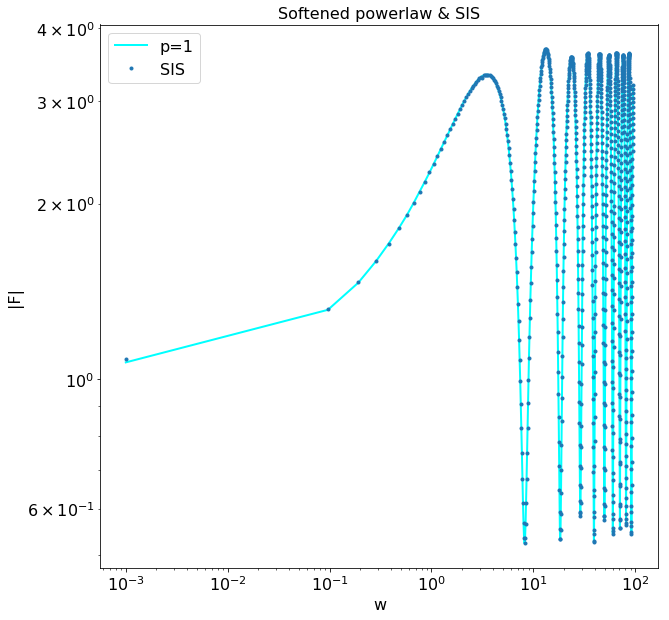

No handles with labels found to put in legend.


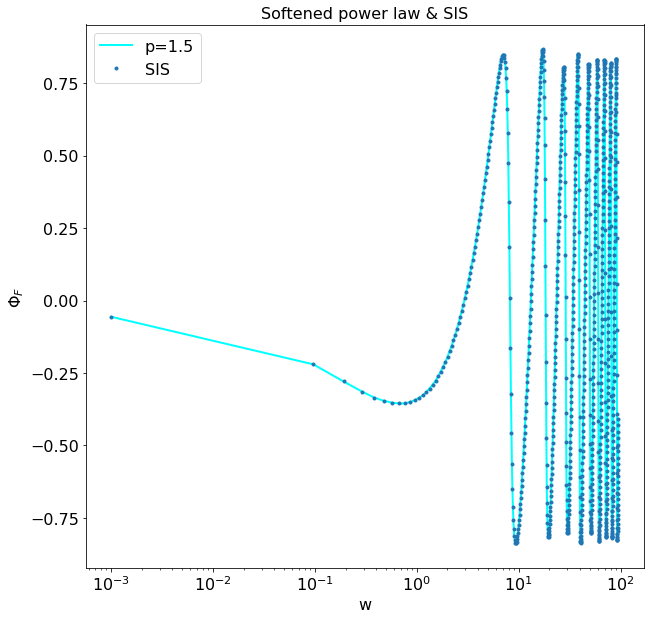

In [337]:
folder='./Results/softenedpowerlaw/p=1/Levin_softenedpowerlaw_lens_dist_0.3_a_1_b_0_c_1_p_1.txt'

PutLabels('w','|F|','Softened powerlaw & SIS')


dfpk=pd.read_csv(folder, sep="\t")   
amp=[float(abs(complex(i))) for i in dfpk.res_adaptive.values]
plt.plot(dfpk.w.values,amp,'-',label='p='+str(1),c='cyan',lw=2)
plt.plot(SISRef.w.values,SISRefamp,'.',label='SIS')
plt.xscale('log')
plt.yscale('log')

plt.legend()
plt.savefig('./Results/softenedpowerlaw/amp_SIS-soft.png')
plt.show()

PutLabels('w','$\Phi_F$','Softened power law & SIS')
phase=Phase(dfpk)  
plt.plot(dfpk.w.values,phase,'-',label='p='+str(p),c='cyan', lw=2)
plt.plot(SISRef.w.values,SISRefphase,'.',label='SIS', lw=0.7)
plt.xscale('log')

plt.legend()
plt.savefig('./Results/softenedpowerlaw/phase_SIS-soft.png')
plt.show()

In [159]:
3+6*2+3+6+30+6*5 +30 +6

120

In [315]:
7.57/10*30

22.71